# Example 5.4 / Plot

For $\rho_{i,j}=0.8$ for all $i,j$, we consider prices of digital options

We want to compute bounds for the payoff function 
$$
c_{2,K} = \left(\min_{k=1,2,3,i=1,2}S_{t_i}^k - K \right)_+
$$
for different values of $K$.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#from matplotlib import rc
#rc('text', usetex=True)
import numpy as np
import pylab
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
import scipy.integrate as integrate
from scipy.stats import norm
from scipy.stats import multivariate_normal
style.use('ggplot')


Load the Data

In [2]:
data_list = []
for i in range(1,7):
    data_list = data_list+[pd.read_csv("clustercode_quasi_copulas/qc_"+str(i)+".csv")]
data = pd.concat(data_list,1)

Plot the results

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


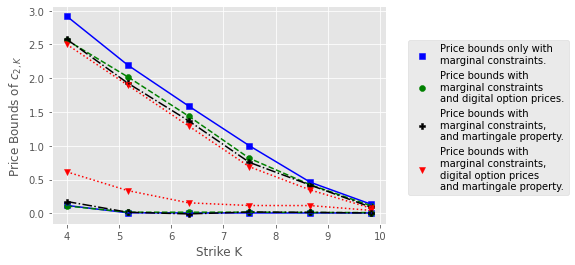

In [6]:
numbers_discrete = 7
nr_considered = 6
x = np.linspace(4,11,numbers_discrete)[:nr_considered]


upper_constraints_MG = data.iloc[0,:]
upper_MG = data.iloc[1,:] 
upper_constraints = data.iloc[2,:]
upper_FH = data.iloc[3,:]
lower_constraints_MG = data.iloc[4,:]
lower_MG = data.iloc[5,:]
lower_constraints = data.iloc[6,:]
lower_FH = data.iloc[7,:]

plt.plot(x[:nr_considered],upper_FH[:nr_considered],color = "blue",linestyle='solid')
plt.plot(x[:nr_considered],upper_constraints[:nr_considered],color = "green",linestyle='dashed')
plt.plot(x[:nr_considered],upper_constraints_MG[:nr_considered],color = "red",linestyle='dotted')
plt.plot(x[:nr_considered],upper_MG[:nr_considered],color = "black",linestyle='dashdot')
plt.plot(x[:nr_considered],lower_FH[:nr_considered],color = "blue",linestyle='solid')
plt.plot(x[:nr_considered],lower_constraints[:nr_considered],color = "green",linestyle='dashed')
plt.plot(x[:nr_considered],lower_constraints_MG[:nr_considered],color = "red",linestyle='dotted')
plt.plot(x[:nr_considered],lower_MG[:nr_considered],color = "black",linestyle='dashdot')
plt.xlabel("Strike K")
plt.ylabel("Price Bounds of "+ r"$c_{2,K}$")
plt.scatter(x[:nr_considered],upper_FH[:nr_considered],color = "blue",marker='s',label="Price bounds only with \nmarginal constraints.")
plt.scatter(x[:nr_considered],upper_constraints[:nr_considered],color = "green",marker='o',label ="Price bounds with \nmarginal constraints\nand digital option prices.")  #
plt.scatter(x[:nr_considered],upper_MG[:nr_considered],color = "black",marker='P', label="Price bounds with \nmarginal constraints,\nand martingale property.")#
plt.scatter(x[:nr_considered],upper_constraints_MG[:nr_considered],color = "red",marker='v', label="Price bounds with \nmarginal constraints,\ndigital option prices\nand martingale property.")#
plt.scatter(x[:nr_considered],lower_FH[:nr_considered],color = "blue",marker='s')
plt.scatter(x[:nr_considered],lower_constraints[:nr_considered],color = "green",marker='o')  
plt.scatter(x[:nr_considered],lower_constraints_MG[:nr_considered],color = "red",marker='v')
plt.scatter(x[:nr_considered],lower_MG[:nr_considered],color = "black",marker='P')#

plt.legend(bbox_to_anchor=(1.05, 0.87), loc='best')
plt.savefig('eps/exa_42_martingale_improvement.eps', format='eps', bbox_inches='tight')
plt.show()